In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
#Read in csv file
df = pd.read_csv("election_data.csv")

#Filter for 2012 and 2016
df_2012 = df[df["year"] == 2012]
df_2016 = df[df["year"] == 2016]

In [161]:
#Create pivot table with candidates as columns and votes as vales
pivot_2012 = df_2012.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2012 dataframe
merged_2012 = df_2012.merge(pivot_2012, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2012 = merged_2012.groupby(["state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2012 = merged_grouped_2012.iloc[:,-3:].astype(int)

#Create total votes column
election_2012["Total Votes"] = election_2012.sum(1)

#Show results
election_2012.head(10)


Barack Obama  Mitt Romney  Other  Total Votes
state_po county                                                    
AK       District 1           1518         5899    305         7722
         District 10          1344         4928    298         6570
         District 11          2222         6057    352         8631
         District 12          1901         4300    281         6482
         District 13          2425         3078    204         5707
         District 14          3340         3453    275         7068
         District 15          3283         2875    293         6451
         District 16          4013         2876    292         7181
         District 17          2853         1542    194         4589
         District 18          4247         2369    314         6930

In [162]:
#Find total votes for Barack Obama 2012
obama_total = election_2012["Barack Obama"].sum()

#Find total votes for Mitt Romney 2012
romney_total = election_2012["Mitt Romney"].sum()

#Find total votes for Other 2012
other_2012_total = election_2012["Other"].sum()


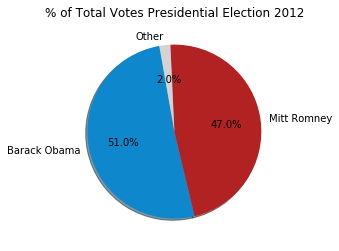

In [163]:
#Add labels
labels_2012 = ["Barack Obama", "Mitt Romney", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2012")

#Set the values of each section of the pie chart
sizes_2012 = [obama_total, romney_total, other_2012_total]

#Set the colors of each section of the pie chart
colors_2012 = ["#0e87cc", "firebrick", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2012, labels=labels_2012, colors=colors_2012,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [164]:
#Create pivot table with candidates as columns and votes as vales
pivot_2016 = df_2016.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2016 dataframe
merged_2016 = df_2016.merge(pivot_2016, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2016 = merged_2016.groupby(["state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2016 = merged_grouped_2016.iloc[:,-3:].astype(int)

#Create total votes column
election_2016["Total Votes"] = election_2016.sum(1)

#Show results
election_2016.head(10)



Donald Trump  Hillary Clinton  Other  Total Votes
state_po county                                                        
AK       District 1           3180             2573    885         6638
         District 10          6255             1808    977         9040
         District 11          6444             2142   1103         9689
         District 12          6629             1928    986         9543
         District 13          4028             1684    821         6533
         District 14          5978             3043   1399        10420
         District 15          2525             1828    629         4982
         District 16          3203             3294    939         7436
         District 17          2618             3290    880         6788
         District 18          2684             3909    809         7402

In [191]:
#Find total votes for Donald Trump 2016
trump_total = election_2016["Donald Trump"].sum()

#Find total votes for Hillary Clinton 2016
clinton_total = election_2016["Hillary Clinton"].sum()

#Find total votes for Other 2016
other_2016_total = election_2016["Other"].sum()

trump_total

62978290

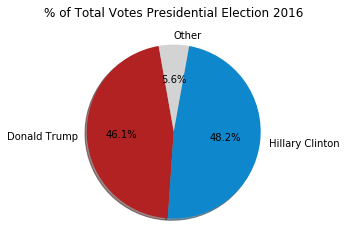

In [166]:
#Add labels
labels_2016 = ["Donald Trump", "Hillary Clinton", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2016")

#Set the values of each section of the pie chart
sizes_2016 = [trump_total, clinton_total, other_2016_total]

#Set the colors of each section of the pie chart
colors_2016 = ["firebrick", "#0e87cc", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2016, labels=labels_2016, colors=colors_2016,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [167]:
#Join 2012 and 2016 dataframes
election_df = election_2012.join(election_2016, rsuffix = "_2016", lsuffix="_2012")

#Show results
election_df.head(10)

Barack Obama  Mitt Romney  Other_2012  Total Votes_2012  \
state_po county                                                                 
AK       District 1           1518         5899         305              7722   
         District 10          1344         4928         298              6570   
         District 11          2222         6057         352              8631   
         District 12          1901         4300         281              6482   
         District 13          2425         3078         204              5707   
         District 14          3340         3453         275              7068   
         District 15          3283         2875         293              6451   
         District 16          4013         2876         292              7181   
         District 17          2853         1542         194              4589   
         District 18          4247         2369         314              6930   

                      Donald Trump  Hillary Clinton  Other_2016  \
state_po county                                                   
AK       District 1           3180             2573         885   
         District 10          6255             1808         977   
         District 11          6444             2142        1103   
         District 12          6629             1928         986   
         District 13          4028             1684         821   
         District 14          5978             3043        1399   
         District 15          2525             1828         629   
         District 16          3203             3294         939   
         District 17          2618             3290         880   
         District 18          2684             3909         809   

                      Total Votes_2016  
state_po county                         
AK       District 1               6638  
         District 10              9040  
         District 11              9689  
         District 12              9543  
         District 13              6533  
         District 14             10420  
         District 15              4982  
         District 16              7436  
         District 17              6788  
         District 18              7402

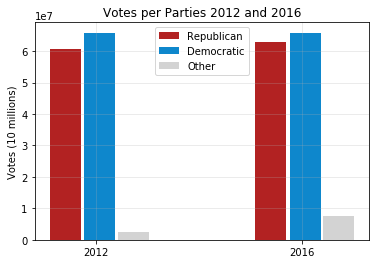

In [192]:

republican = (romney_total, trump_total)
democratic = (obama_total, clinton_total)
other = (other_2012_total, other_2016_total)

#The x locations for the groups
ind = np.arange(len(democratic)) 

#The width of the bars
width = 0.15  

#Create the bars
fig, ax = plt.subplots()
rects1 = plt.bar(ind - width, republican, width, label='Republican', color="firebrick")
rects2 = plt.bar(ind + width/9, democratic, width, label='Democratic', color="#0e87cc")
rects3 = plt.bar(ind + width*1.2, other, width, label='Other', color="lightgray")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Votes (10 millions)')
plt.title('Votes per Parties 2012 and 2016')

#Add legend
plt.legend(loc= "upper center")

#Add grid
plt.grid(alpha= 0.3)

#Set ticks
plt.xticks(ind)

#Add tick labels
ax.set_xticklabels(('2012', '2016'))

#Show bar chart
plt.show()